# Flight Price Prediction

We all know that flight travel has become an important part of our life, it is the fastest way of travelling. People often see that flight fare fluctuates freqently.we also observed that if we book our ticket a week before the flight,we get some relief in the price. we will try to build a prediction model which can predict the flight fare based on the given dataset.

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# Features

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
train_df= pd.read_excel(r'C:\python\Train_Data.xlsx')
test_df= pd.read_excel(r'C:\python\Test_set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


The only column with numeric data is "Price" which is our target column making all the remaining columns as features using which we need to predict our label. Since the values present in the "Price" column has continous data it makes this to be a Regression problem!

# EDA

In [5]:
train_df.shape

(10683, 11)

In [6]:
test_df.shape

(2671, 10)

In [7]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Cleaning

# Check For Null Values

In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have null value in route column which cannot be filled randomly, so as stops. Since the null values are in single row we shall drop it.

In [10]:
train_df.dropna(inplace=True)

In [11]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_df.shape

(10682, 11)

In [13]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [15]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Now Both the train data and test data are free from null values

In [16]:
def date_seperation(df):
   
    df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
    df['Year']=df['Date_of_Journey'].dt.year
    df['Month']=df['Date_of_Journey'].dt.month
    df['Day']=df['Date_of_Journey'].dt.day
    df=df.drop(['Route', 'Date_of_Journey'],axis=1)
    return df

train_df = date_seperation(train_df)
print(f"Rows and Columns:", train_df.shape)
train_df.head()



Rows and Columns: (10682, 12)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [17]:
test_df = date_seperation(test_df)
print(f"Rows and Columns:", test_df.shape)
test_df.head()

Rows and Columns: (2671, 11)


,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Year,Month,Day
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


The date information is converted into proper numerical format with a function .We are dropping the Date of Journey column since it's data was already converted, then we are removing the Route column as we have source and destination data so Route was not adding much insight 

In [18]:
def time_seperation(df):
    df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
    df['Departure_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
    df=df.drop(['Dep_Time'],axis=1)
    df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
    df=df.drop(['Arrival_Time'],axis=1)
    df=df.drop(['Duration'], axis=1)
    return df

In [19]:
train_df = time_seperation(train_df)
print(f"Rows and Columns:", train_df.shape)
train_df.head()

Rows and Columns: (10682, 13)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35


In [20]:
test_df = time_seperation(test_df)
print(f"Rows and Columns:", test_df.shape)
test_df.head()

Rows and Columns: (2671, 12)


,Airline,Source,Destination,Total_Stops,Additional_Info,Year,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45


In [21]:
train_df.nunique()

Airline               12
Source                 5
Destination            6
Total_Stops            5
Additional_Info       10
Price               1870
Year                   1
Month                  7
Day                    9
Departure_hour        24
Departure_minute      12
Arrival_hour          24
Arrival_minute        12
dtype: int64

In [22]:
test_df.nunique()

Airline             11
Source               5
Destination          6
Total_Stops          5
Additional_Info      6
Year                 1
Month                7
Day                  9
Departure_hour      24
Departure_minute    12
Arrival_hour        24
Arrival_minute      12
dtype: int64

In both the datasets, year of journey has only one values, So dropping this column since it wont add much to the price prediction

In [23]:
train_df.drop(['Year'], axis=1, inplace=True)
test_df.drop(['Year'], axis=1, inplace=True)

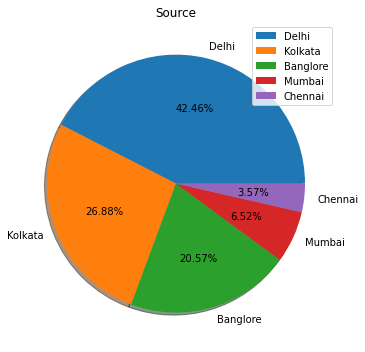

In [24]:
plt.figure(figsize=(10,5))
plt.pie(train_df['Source'].value_counts(), labels=train_df['Source'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('Source')
plt.tight_layout()
plt.show()

Source column have the highest number of rows covered by Delhi and the lowest number of rows covered by Chennai

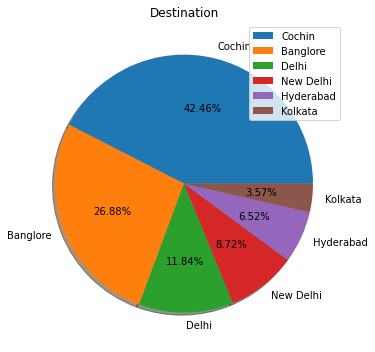

In [25]:
plt.figure(figsize=(10,5))
plt.pie(train_df['Destination'].value_counts(), labels=train_df['Destination'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('Destination')
plt.tight_layout()
plt.show()

Destination column have the highest number of rows covered by Cochin and the lowest number of rows covered by Kolkata

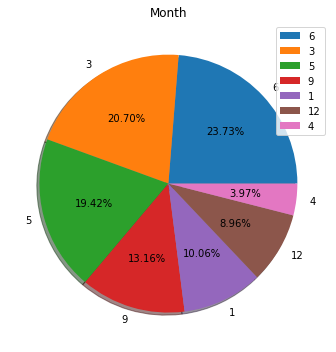

In [26]:
plt.figure(figsize=(10,5))
plt.pie(train_df['Month'].value_counts(), labels=train_df['Month'].value_counts().index, shadow=True, autopct='%1.2f%%')
plt.legend(prop={'size':10})
plt.title('Month')
plt.tight_layout()
plt.show()

We see that in our data set that most of the journey made by people were in the month of June and least in the month of April

In [27]:
def plot_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

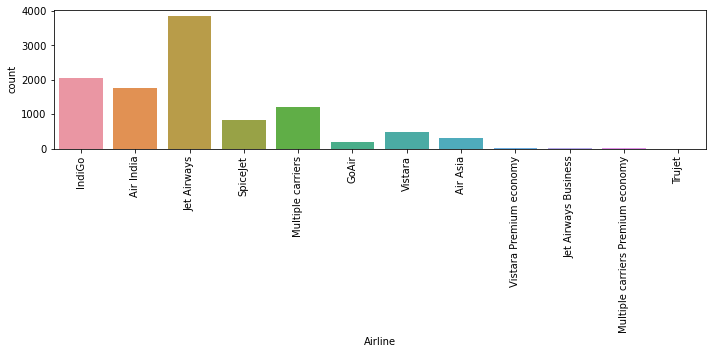

In [28]:
plot_countplot(train_df['Airline'])

The airline column shows that highest number of flight details are for Jet Airways followed by Indigo and Air India

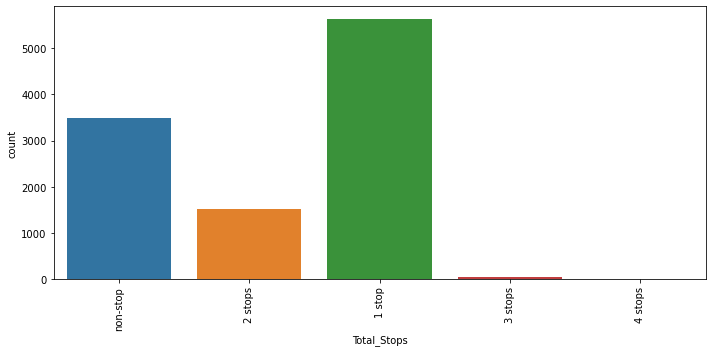

In [29]:
plot_countplot(train_df['Total_Stops'])

From the above column, we see highest count of rows covered by 1 stop flight hauls and the least numbers are for 3 and 4 stops

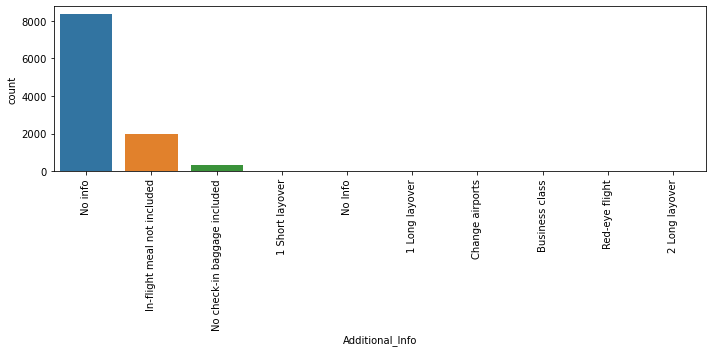

In [30]:
plot_countplot(train_df['Additional_Info'])

In additional information column most number of rows are filled by no info values and rest of the values cover very less to negligible data points

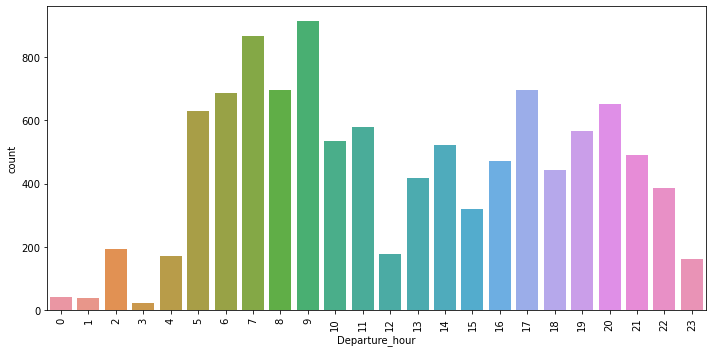

In [31]:
plot_countplot(train_df['Departure_hour'])

The departure hour column tells us that most number of flights get scheduled at 7 and 9 hour morning time and then there is a spike at 17 and 20 hour evening time

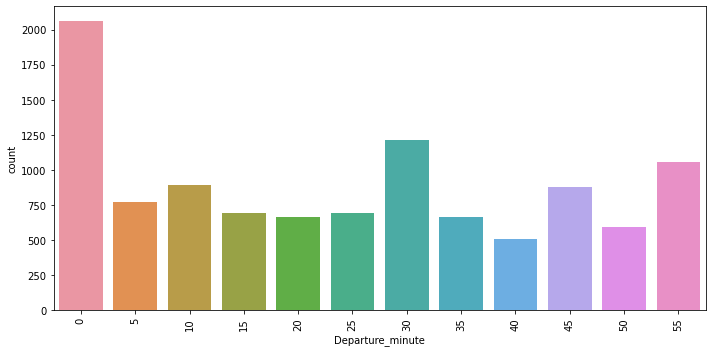

In [32]:
plot_countplot(train_df['Departure_minute'])

The departure minute column gives us the indication that most number of flights get scheduled at 0 minutes for departure

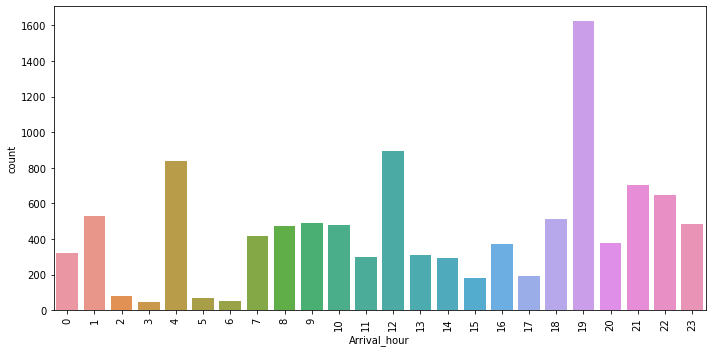

In [33]:
plot_countplot(train_df['Arrival_hour'])

This column gives us the indication that most number of flights get scheduled at 19 hour in the evening and then the chosen option for arrivals are 12 in the noon or 4 in the night

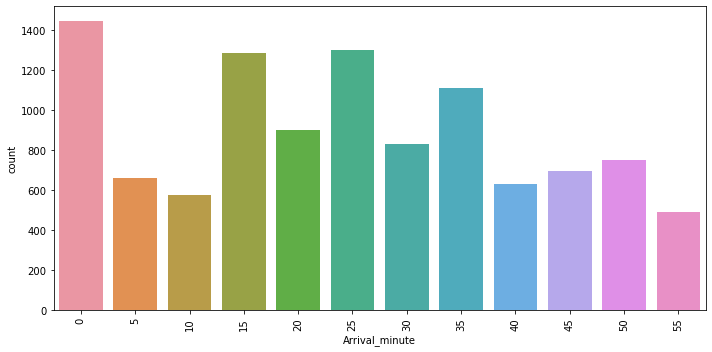

In [34]:
plot_countplot(train_df['Arrival_minute'])


The arrival minute column gives us the indication that most number of flights get scheduled at 0 minutes for arrival

<AxesSubplot:xlabel='Source', ylabel='Price'>

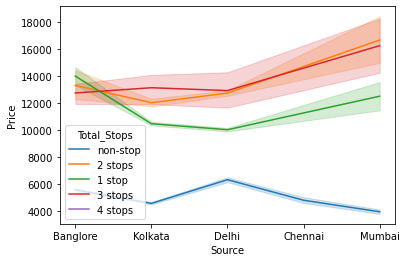

In [35]:
#plt.figure(figsize=(10,6))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=train_df)

We see that non stop flights have lower price irrespective of the source as compared to flights that have 1 or more than 1 stops in the flight haul.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

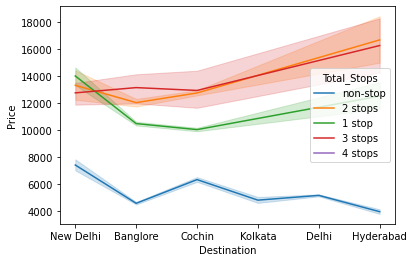

In [36]:
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=train_df)

In the above line plot we see that non stop flights have lower price irrespective of the destination as compared to flights that have 1 or more than 1 stops in the flight haul.

<AxesSubplot:xlabel='Month', ylabel='Price'>

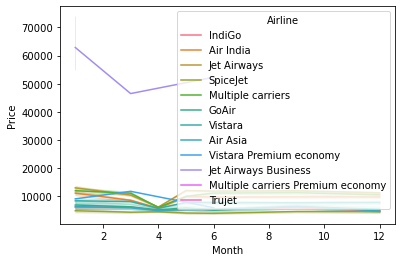

In [37]:
sns.lineplot(x='Month', y='Price', hue='Airline', data=train_df)

In the above line plot we see that Jet Airways Business class has the highest price than the rest of the flight

<AxesSubplot:xlabel='Departure_hour', ylabel='Price'>

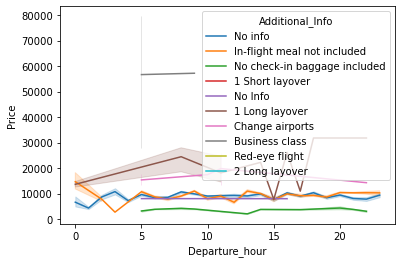

In [38]:
sns.lineplot(x='Departure_hour', y='Price', hue='Additional_Info', data=train_df)

We see that business class has high price and it's departure hour is between 5-10 but the second highest pricing is for 1 long layover.

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

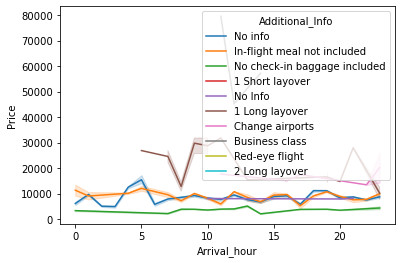

In [39]:
sns.lineplot(x='Arrival_hour', y='Price', hue='Additional_Info', data=train_df)

In the above line plot we see that price for no check-in bag included is least as compared to the business class.

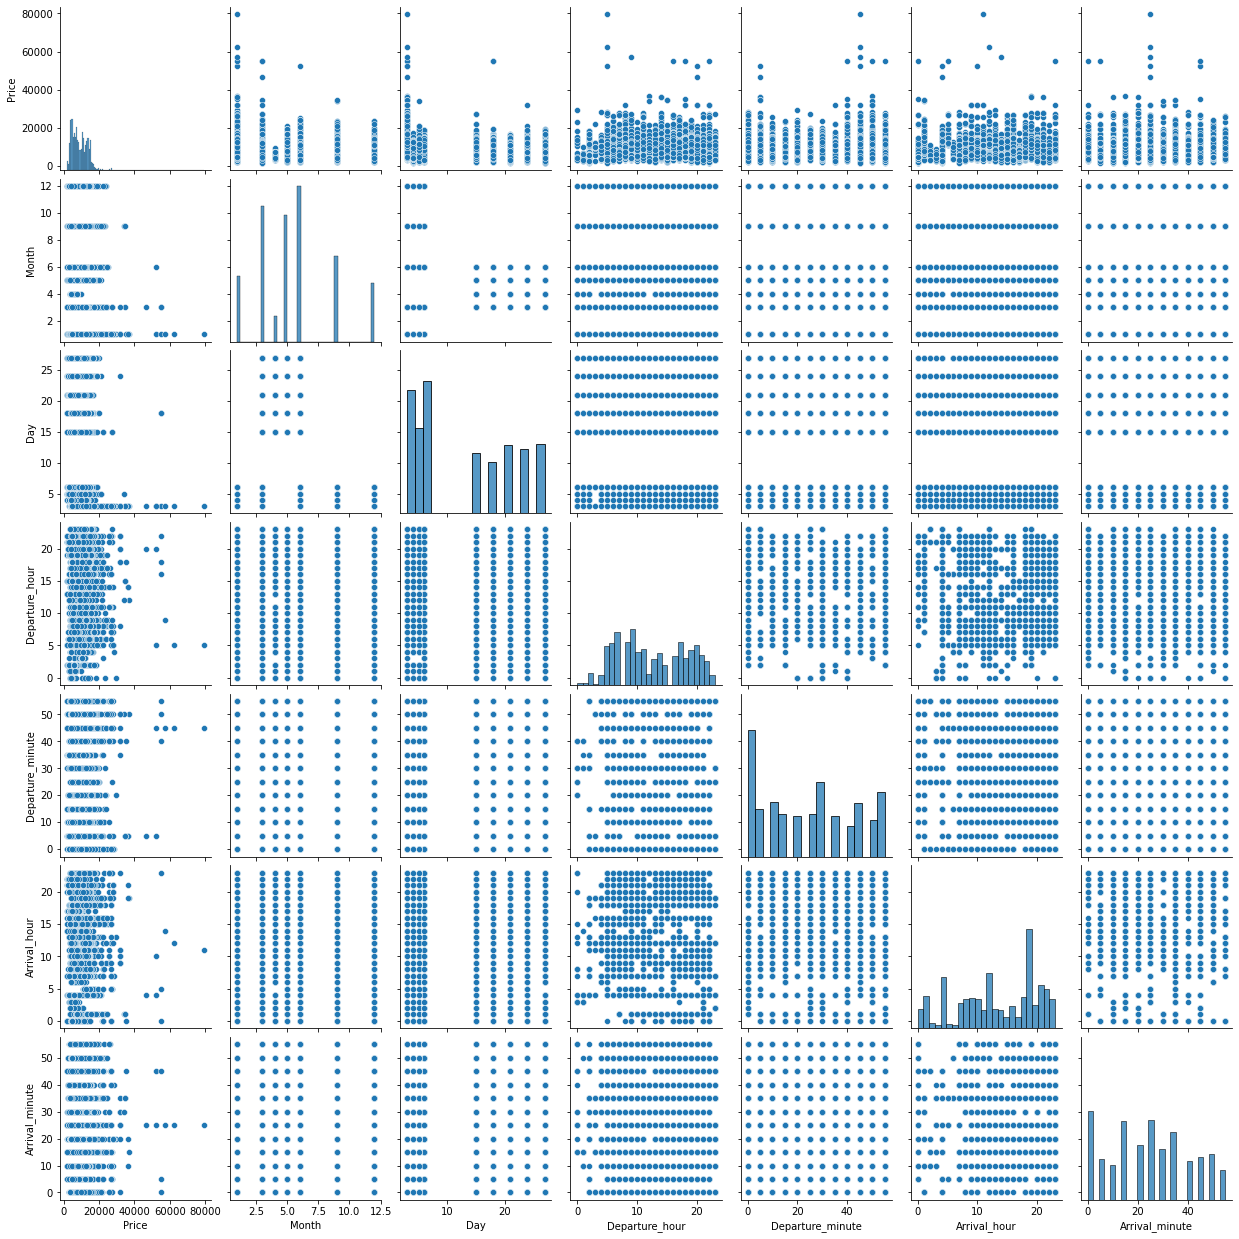

In [40]:
sns.pairplot(train_df)

In [41]:
cat_columns= [x for x in train_df.dtypes.index if train_df.dtypes[x]=='object']
cat_columns

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

In [42]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [43]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [44]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [45]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [46]:
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

#Test data set

In [47]:
cat_columns1= [x for x in test_df.dtypes.index if test_df.dtypes[x]=='object']
cat_columns1

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

# Encode Categorical Columns

In [48]:
LE= LabelEncoder()

In [49]:
for i in cat_columns:
    train_df[i]= LE.fit_transform(train_df[i])

In [50]:
for i in cat_columns1:
    test_df[i]= LE.fit_transform(test_df[i])

# Data Description

In [51]:
train_df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,1.458248,7.392998,9087.214567,5.534731,12.682925,12.491013,24.409287,13.349186,24.690601
std,2.352090,1.177276,1.474845,1.806320,1.214254,4611.548810,2.987626,8.803800,5.748820,18.767801,6.859317,16.506808
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


The columns Airline, Destinatin, price have skewness in it, which can be handled with Power Transform

# To Find Correlation

In [52]:
train_df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
Airline,1.000000,-0.013397,0.018446,0.035973,-0.060748,-0.039565,-0.007900,0.031118,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,-0.225605,-0.022109,0.015999,0.063052,0.007563,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,0.337872,0.026821,-0.071122,-0.105035,-0.052102,-0.072997,0.127931,-0.039729,0.017196
Total_Stops,0.035973,-0.225605,0.337872,1.000000,0.164054,-0.571221,-0.056514,0.043844,0.039224,0.048901,-0.095650,0.175980
Additional_Info,-0.060748,-0.022109,0.026821,0.164054,1.000000,-0.065463,-0.009105,-0.019416,-0.050983,-0.019392,0.026204,0.041310
Price,-0.039565,0.015999,-0.071122,-0.571221,-0.065463,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155
Month,-0.007900,0.063052,-0.105035,-0.056514,-0.009105,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786
Day,0.031118,0.007563,-0.052102,0.043844,-0.019416,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423
Departure_hour,-0.035269,0.059047,-0.072997,0.039224,-0.050983,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911
Departure_minute,-0.059922,-0.056998,0.127931,0.048901,-0.019392,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597


<AxesSubplot:>

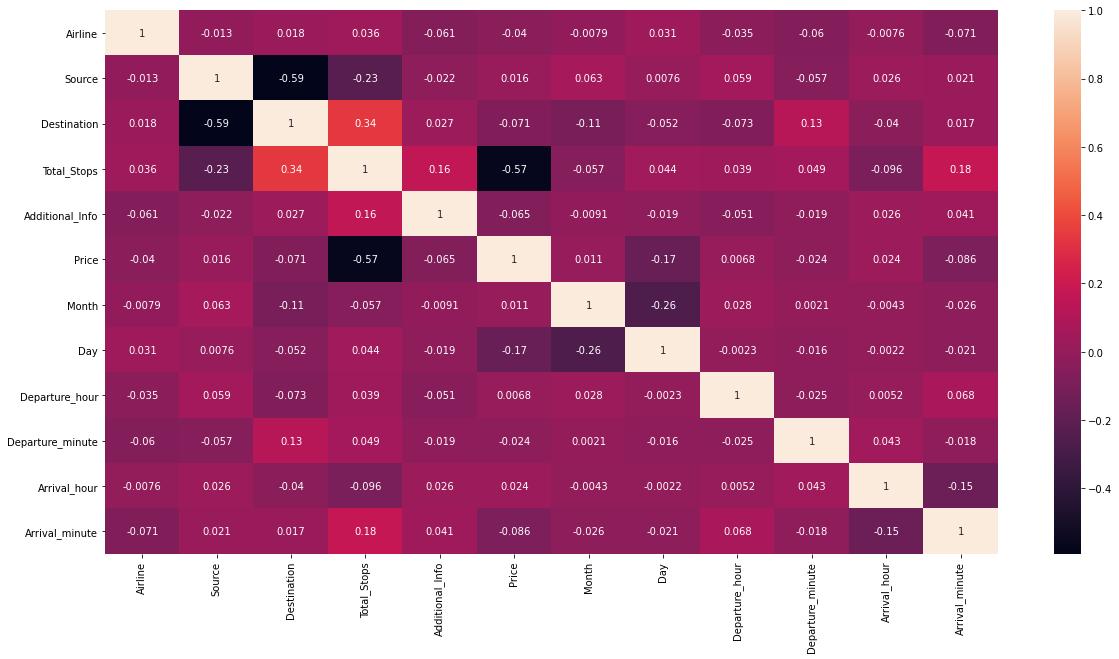

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True)

Destination and Total_Stops are correlated to each other. We shall see the multi collinearity with VIF 

# Check For Multi Collinearity- VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
df1=train_df.drop('Price', axis=1)

In [56]:
df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,3,0,5,4,8,3,24,22,20,1,10
1,1,3,0,1,8,1,5,5,50,13,15
2,4,2,1,1,8,9,6,9,25,4,25
3,3,3,0,0,8,12,5,18,5,23,30
4,3,0,5,0,8,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,9,4,19,55,22,25
10679,1,3,0,4,8,4,27,20,45,23,20
10680,4,0,2,4,8,4,27,8,20,11,20
10681,10,0,5,4,8,1,3,11,30,14,10


In [57]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [58]:
vif_fun()

,vif_factor,features
0,3.632029,Airline
1,5.239213,Source
2,2.997043,Destination
3,1.994648,Total_Stops
4,18.282359,Additional_Info
5,4.428628,Month
6,3.104972,Day
7,5.351189,Departure_hour
8,2.691296,Departure_minute
9,4.709303,Arrival_hour


High level of Multi Collinearity is not seen in any columns.

In [59]:
df1['Price']= train_df['Price']

# Check For Skewness

In [60]:
df1.skew().sort_values(ascending=False)

Price               1.812405
Destination         1.244046
Airline             0.731057
Total_Stops         0.631532
Month               0.629556
Day                 0.367212
Departure_minute    0.167234
Departure_hour      0.112924
Arrival_minute      0.110945
Arrival_hour       -0.370146
Source             -0.424023
Additional_Info    -1.779689
dtype: float64

In [61]:
df1.drop(['Price'], axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [63]:
df1['Price']= train_df['Price']

# Check For Outliers

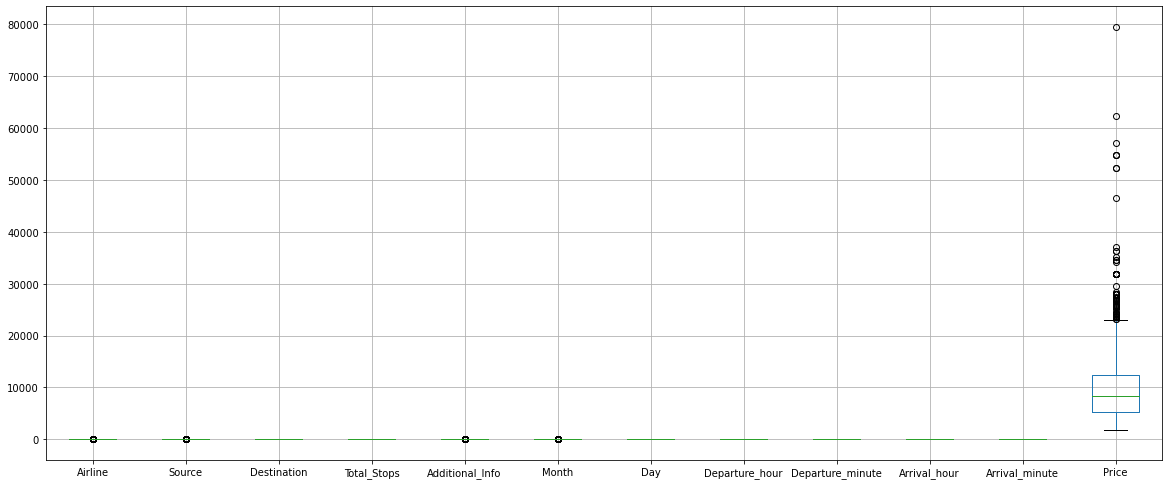

In [64]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There may be posibility of outliers in certain columns. we shall handle it.

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.41080484, 1.65835945, 2.41653414, ..., 1.80043628, 0.8900139 ,
        1.12553455],
       [1.26115217, 0.89001433, 0.97381203, ..., 0.05090913, 0.5870944 ,
        0.30906781],
       [0.01436882, 0.04055641, 0.2957428 , ..., 1.3630545 , 0.0187446 ,
        1.03978296],
       ...,
       [0.01436882, 1.65835945, 0.38232644, ..., 0.34249699, 0.2841749 ,
        0.40296691],
       [2.56541078, 1.65835945, 2.41653414, ..., 0.0948848 , 0.8900139 ,
        0.77218138],
       [1.26115217, 0.04055641, 0.2957428 , ..., 0.82385444, 0.5870944 ,
        0.57809433]])

In [66]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,  9714,
        9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10363,
       10382, 10438, 10510, 10510], dtype=int64), array([11, 11, 11, 11, 11, 11, 11,  4, 

In [67]:
df_new= df1[(z<3).all(axis=1)]

In [68]:
df_new.shape

(10577, 12)

In [69]:
df1.shape

(10682, 12)

In [70]:
#Loss
loss= (10682-10577)/10682 *100
loss

0.9829619921363041

Very less percent of the data is lost. So we shall proceed with Model Training

# Spliting the data and Balancing 

In [71]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [72]:
df2= test_df

In [73]:
xtest=df2

In [74]:
df3= pd.read_excel(r'C:\python\Sample.xlsx')

In [75]:
ytest=df3

In [76]:

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [77]:
y.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1821, dtype: int64

The target variable is of continous type, so we shall use regression models.

# Train the Model

In [78]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Check the best Random State

# Linear Regression

In [79]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.7574233507896319 on Random_state 78


# To Find the Best Cross Validation Score

In [80]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [81]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [82]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.40920758799063284 and accuracy score for training is 0.41243671613397537 and the accuracy for testing is 0.5831882282015046


At cross fold 3 the cv score is 0.41058691696256644 and accuracy score for training is 0.41243671613397537 and the accuracy for testing is 0.5831882282015046


At cross fold 4 the cv score is 0.4110438942109301 and accuracy score for training is 0.41243671613397537 and the accuracy for testing is 0.5831882282015046


At cross fold 5 the cv score is 0.41053555172854245 and accuracy score for training is 0.41243671613397537 and the accuracy for testing is 0.5831882282015046


At cross fold 6 the cv score is 0.4101538288963888 and accuracy score for training is 0.41243671613397537 and the accuracy for testing is 0.5831882282015046


At cross fold 7 the cv score is 0.410397330293342 and accuracy score for training is 0.41243671613397537 and the accuracy for testing is 0.5831882282015046


At cross fold 8 the cv score is 0.4109074734

 Random_state= 78, CV score is best with cv=8. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=78)

In [119]:
# Linear Regression Model

lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predlr)))
print('MBE=', mean_absolute_error(ytest,predlr))

R2= 0.7574233507896319
RMSE= 1848.7413444012552
MBE= 1555.2201926654675


In [85]:
cv_score=cross_val_score(lr,x,y, cv=8)
print('Cross Validation Score of LinearRegression is:', cv_score.mean())

Cross Validation Score of LinearRegression is: 0.41090747343000045


In [86]:
diff= 0.7574- 0.4109
diff

0.3465

In [118]:
# Ridge Regression

rd=Ridge(alpha=1e-2, normalize=True)
rd.fit(xtrain,ytrain)
predrd= rd.predict(xtest)
print('R2=', r2_score(ytest,predrd))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predrd)))
print('MBE=', mean_absolute_error(ytest,predrd))


R2= 0.7552389648875815
RMSE= 1857.0465830723301
MBE= 1564.5902709495026


In [88]:
cv_score=cross_val_score(rd,x,y, cv=8)
print('Cross Validation Score of RidgeRegression is:', cv_score.mean())

Cross Validation Score of RidgeRegression is: 0.41087026037475705


In [89]:
diff= 0.7552- 0.4108
diff

0.3444

In [117]:
# Lasso Regression

ls=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predls)))
print('MBE=', mean_absolute_error(ytest,predls))


R2= 0.7573319235305404
RMSE= 1849.0897073434505
MBE= 1555.380149823514


In [91]:
cv_score=cross_val_score(ls,x,y, cv=8)
print('Cross Validation Score of LassoRegression is:', cv_score.mean())

Cross Validation Score of LassoRegression is: 0.4109228111834333


In [92]:
diff= 0.7573- 0.4109
diff

0.3464

In [116]:
#SVR

svc=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root mean_squared_error 3562.913349222202
mean_absolute_error: 3228.6795922226165
Score: 0.044533495698890424
r2_score: -138.65679873760354


In [115]:
# Decision Tree Regressor

dtc=DecisionTreeRegressor(criterion="poisson", random_state=111)
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))



Score: 0.9935576315411342
root_mean_squared_error 888.9093317093707
mean_absolute_error: 430.9
r2_score: 0.9500821061859185


In [95]:
cv_score=cross_val_score(dtc,x,y, cv=8)
print('Cross Validation Score of DecisionTreeRegressor is:', cv_score.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.6898735689648843


In [96]:
diff= 0.95-0.6898
diff

0.2602

In [114]:
# Random Forest Regressor

rf=RandomForestRegressor(max_depth=2, max_features="sqrt")
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))


root mean_squared_error 2208.06753920468
mean_absolute_error: 1955.544509455028
Rf Score 0.47131654142739743
r2_score: -0.3015301382190261


In [113]:
# K Neighbors Regressor

knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predknn)))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))


root mean_squared_error 1697.5169601509142
mean_absolute_error: 1171.2900000000002
Rf Score 0.8540584072737928
r2_score: 0.7129790953035783


In [99]:
cv_score=cross_val_score(knn,x,y, cv=8)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.7587137331097094


In [100]:
diff= 0.7587-0.7129
diff

0.04580000000000006

The difference between accuracy score and Cv score is less with KNN which reduces the overfitting of the model. So we shall improve the performance by tuning the Hyper Parameters with GridSearchCV

# HyperParameter Tuning With GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
KNeighborsRegressor()

KNeighborsRegressor()

In [103]:
parameters={'n_neighbors': [4,5,6,7],
            'weights': ['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[30,35,40],
            'p': [1,2,3,4]}

In [104]:
GCV=GridSearchCV(KNeighborsRegressor(), parameters, cv=8, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'uniform'}

In [105]:
GCV.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=40, n_neighbors=4, p=1)

In [107]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.9766564653891934

In [109]:
knn=KNeighborsRegressor(algorithm='ball_tree',
                        leaf_size=40, 
                        n_neighbors=4, 
                        p=1)
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predknn)))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))

root mean_squared_error 573.502037921401
mean_absolute_error: 437.05
Rf Score 0.9033340111185099
r2_score: 0.9740639446170634


After tuning the parameters, r2 score is improved to 97%, which means the model is performing well with the dataset without the problem of underfitting.

# Save The Model

In [111]:
import pickle
filename= 'Flight_Price.pkl'
pickle.dump(knn,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [112]:
x=np.array(ytest)
predicted= np.array(knn.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,14388,13403.25
1,10919,10505.75
2,11410,10836.50
3,12192,12540.75
4,14714,14169.75
5,6442,6471.00
6,4148,4541.50
7,4423,4539.00
8,6961,7079.00
9,4174,4318.50
